# Project 2: Customer Satisfaction Prediction (Classification)

In [449]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib
import numpy as np
import mlflow
import mlflow.sklearn

In [321]:
# Load the dataset
df = pd.read_csv("Passenger_Satisfaction.csv")

In [323]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Cleaning

In [8]:
df.shape

(103904, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [325]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [327]:
df.duplicated().sum()

0

In [329]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [331]:
# Handle missing values: Fill missing values in 'Arrival Delay in Minutes' with the median
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12672\3182016160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean(), inplace=True)


In [333]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Unique & Categorical Insights

In [25]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [35]:
for col in df.columns:
  print(f"{col}:\n Unique values:",df[col].nunique(),"\n", df[col].unique())
  print()

Gender:
 Unique values: 2 
 ['Male' 'Female']

Customer Type:
 Unique values: 2 
 ['Loyal Customer' 'disloyal Customer']

Age:
 Unique values: 75 
 [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]

Type of Travel:
 Unique values: 2 
 ['Personal Travel' 'Business travel']

Class:
 Unique values: 3 
 ['Eco Plus' 'Business' 'Eco']

Flight Distance:
 Unique values: 3802 
 [ 460  235 1142 ...  974 1479  400]

Inflight wifi service:
 Unique values: 6 
 [3 2 4 1 5 0]

Departure/Arrival time convenient:
 Unique values: 6 
 [4 2 5 3 1 0]

Ease of Online booking:
 Unique values: 6 
 [3 2 5 4 1 0]

Gate location:
 Unique values: 6 
 [1 3 2 5 4 0]

Food and drink:
 Unique values: 6 
 [5 1 2 4 3 0]

Online boarding:
 Unique values: 6 
 [3 5 2 1 4 0]

Seat comfort:
 Unique values: 6 
 [5 1 2 3 4 0]

Inflight entertainment

## Handling Outliers

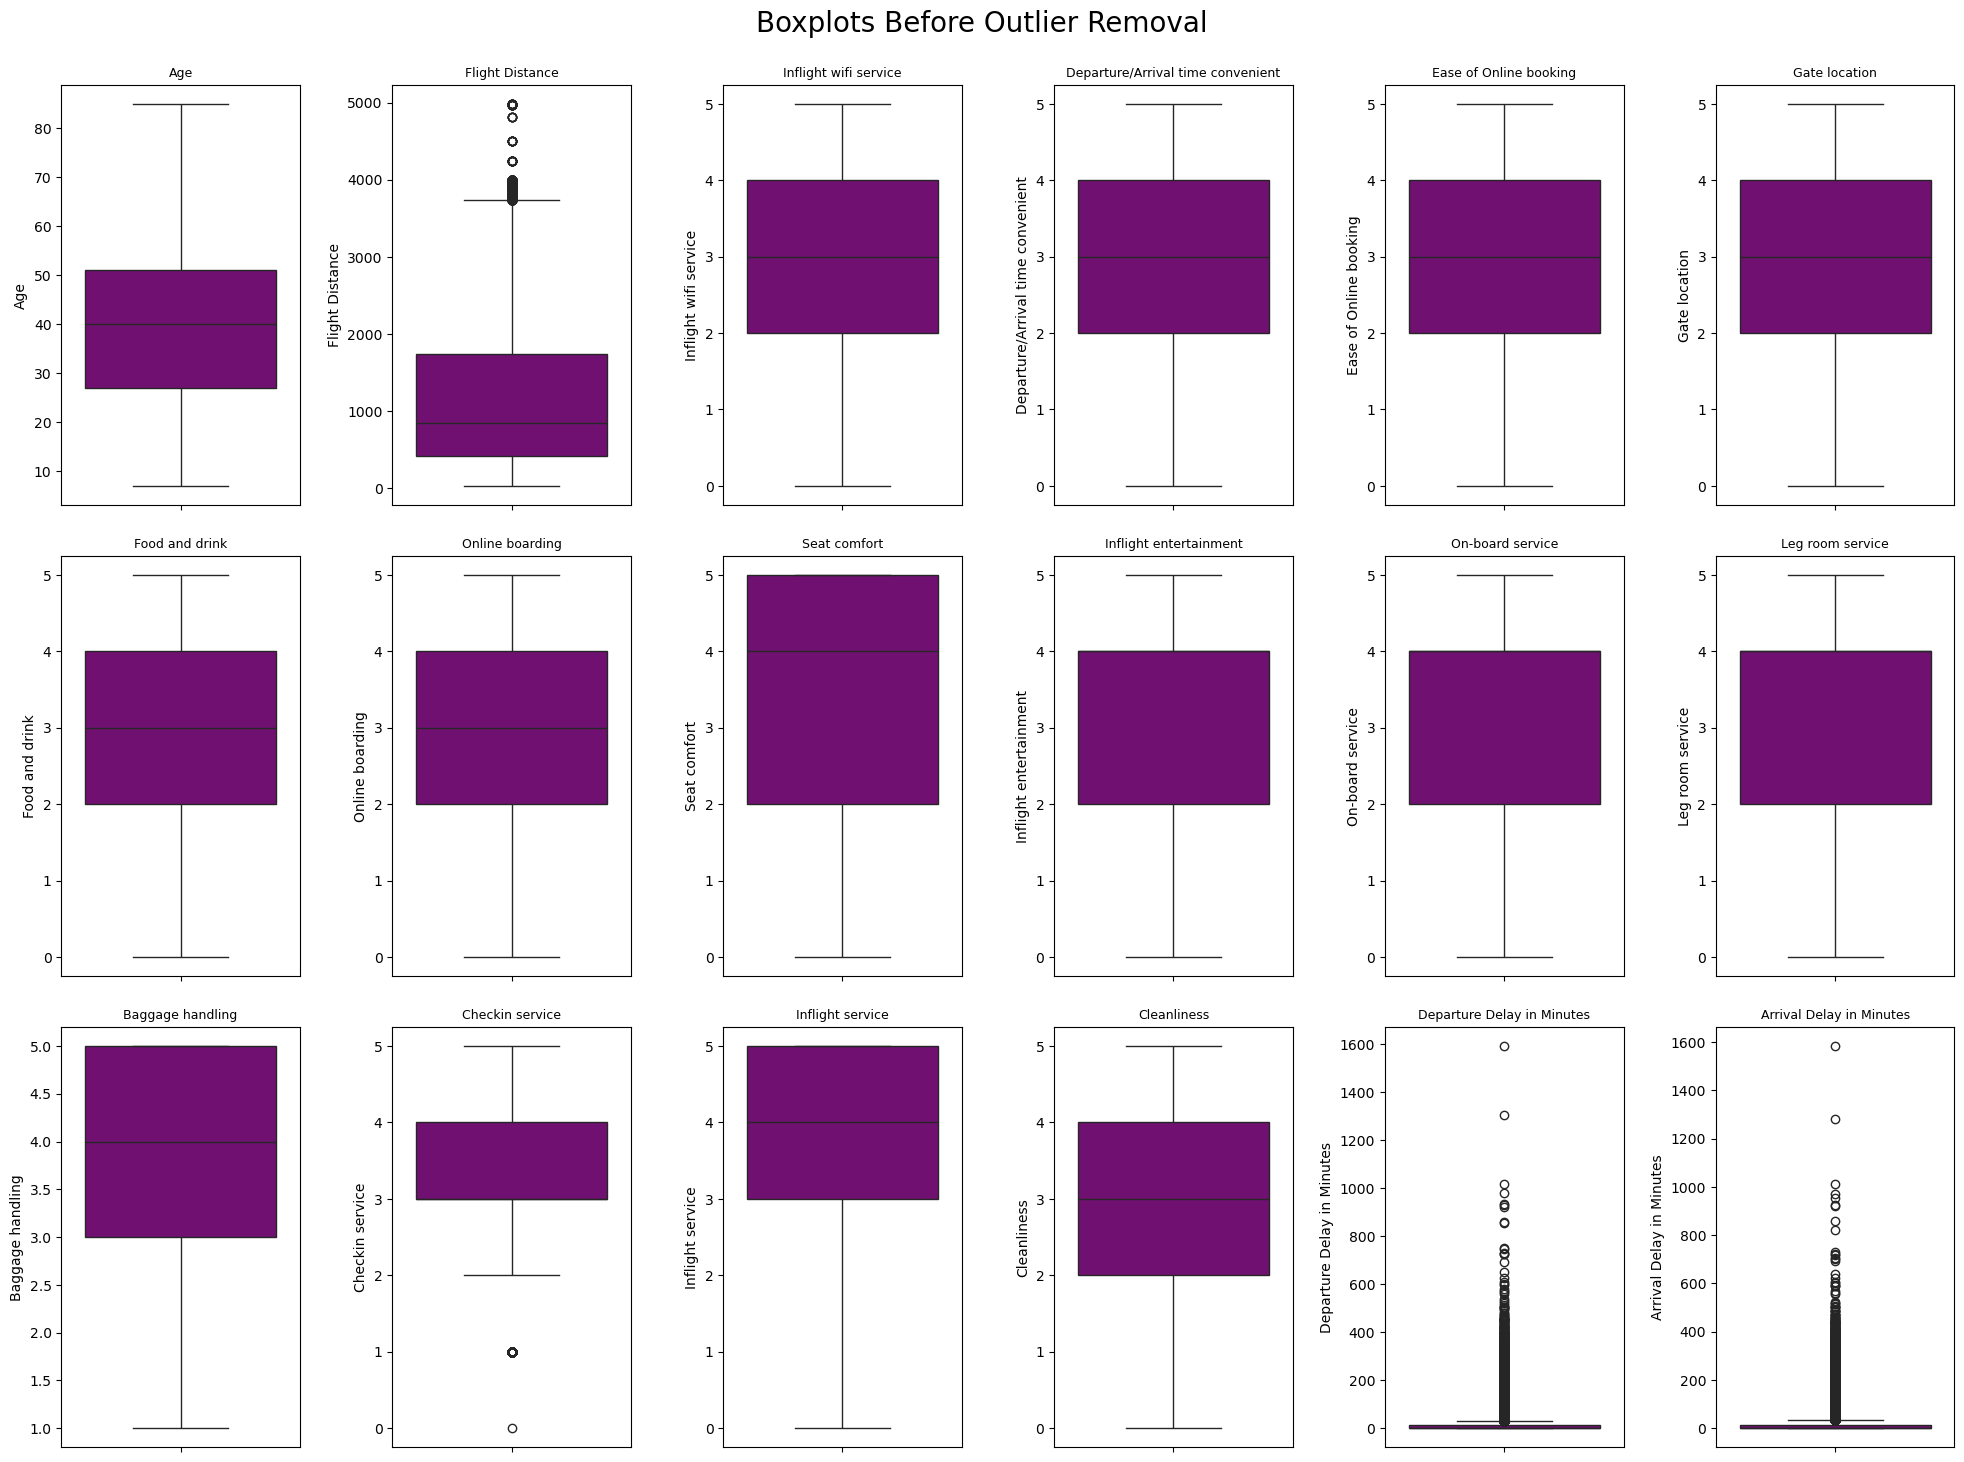

In [15]:
numerical_cols = ['Age', 'Flight Distance', 'Inflight wifi service',
                  'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Inflight service',
                  'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Loop through numerical columns and create boxplots
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplots Before Outlier Removal", fontsize=20)

for i in range(len(numerical_cols)):
    plt.subplot(3, 6, i + 1)  # 3 rows, 6 columns
    sns.boxplot(y=df[numerical_cols[i]], color='purple')
    plt.title(numerical_cols[i], fontsize=9)
    plt.tight_layout(pad=2.0)

plt.subplots_adjust(top=0.93)
plt.show()

In [335]:
# Analyze the "Flight Distance" column for outliers

flight_distance = df['Flight Distance']

In [337]:
# Basic statistics
flight_stats = flight_distance.describe()

In [339]:
# IQR Method
Q1_fd = flight_distance.quantile(0.25)
Q3_fd = flight_distance.quantile(0.75)
IQR_fd = Q3_fd - Q1_fd
lower_bound_fd = Q1_fd - 1.5 * IQR_fd
upper_bound_fd = Q3_fd + 1.5 * IQR_fd

In [341]:
# Outliers
outliers_fd = flight_distance[(flight_distance < lower_bound_fd) | (flight_distance > upper_bound_fd)]
outlier_count_fd = outliers_fd.shape[0]

In [343]:
# Winsorization limits (1st and 99th percentile)
lower_cap_fd = flight_distance.quantile(0.01)
upper_cap_fd = flight_distance.quantile(0.99)
capped_fd = flight_distance.clip(lower=lower_cap_fd, upper=upper_cap_fd)

In [345]:
# Summary after capping
capped_stats_fd = capped_fd.describe()

flight_stats, {
    "Q1": Q1_fd,
    "Q3": Q3_fd,
    "IQR": IQR_fd,
    "Lower Bound": lower_bound_fd,
    "Upper Bound": upper_bound_fd,
    "Outliers Detected": outlier_count_fd
}, capped_stats_fd

(count    103904.000000
 mean       1189.448375
 std         997.147281
 min          31.000000
 25%         414.000000
 50%         843.000000
 75%        1743.000000
 max        4983.000000
 Name: Flight Distance, dtype: float64,
 {'Q1': 414.0,
  'Q3': 1743.0,
  'IQR': 1329.0,
  'Lower Bound': -1579.5,
  'Upper Bound': 3736.5,
  'Outliers Detected': 2291},
 count    103904.000000
 mean       1188.623143
 std         994.112961
 min         101.000000
 25%         414.000000
 50%         843.000000
 75%        1743.000000
 max        3882.000000
 Name: Flight Distance, dtype: float64)

In [347]:
df['Flight Distance'] = capped_fd

In [349]:
# Focus on delay columns
delay_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
delay_data = df[delay_cols]

In [351]:
delay_description = delay_data.describe()
delay_description

,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000
mean,14.815618,15.178678
std,38.230901,38.640909
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [353]:
# Calculate IQR, outlier thresholds, and count outliers
iqr_results = {}
outlier_counts = {}

for col in delay_cols:
    Q1 = delay_data[col].quantile(0.25)
    Q3 = delay_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = delay_data[(delay_data[col] < lower_bound) | (delay_data[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]
    
    iqr_results[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Detected': outliers.shape[0]
    }

In [355]:
iqr_results

{'Departure Delay in Minutes': {'Q1': 0.0,
  'Q3': 12.0,
  'IQR': 12.0,
  'Lower Bound': -18.0,
  'Upper Bound': 30.0,
  'Outliers Detected': 14529},
 'Arrival Delay in Minutes': {'Q1': 0.0,
  'Q3': 13.0,
  'IQR': 13.0,
  'Lower Bound': -19.5,
  'Upper Bound': 32.5,
  'Outliers Detected': 13954}}

In [357]:
# Apply capping using winsorization (1st and 99th percentiles)
capped_df = delay_data.copy()
for col in delay_cols:
    lower_cap = delay_data[col].quantile(0.01)
    upper_cap = delay_data[col].quantile(0.99)
    capped_df[col] = delay_data[col].clip(lower=lower_cap, upper=upper_cap)

In [359]:
# Check new description after capping
capped_description = capped_df.describe()

In [361]:
outlier_counts, capped_description

({'Departure Delay in Minutes': 14529, 'Arrival Delay in Minutes': 13954},
        Departure Delay in Minutes  Arrival Delay in Minutes
 count               103904.000000             103904.000000
 mean                    13.965996                 14.302312
 std                     31.215555                 31.519572
 min                      0.000000                  0.000000
 25%                      0.000000                  0.000000
 50%                      0.000000                  0.000000
 75%                     12.000000                 13.000000
 max                    181.970000                183.000000)

In [363]:
df['Departure Delay in Minutes'] = capped_df['Departure Delay in Minutes']
df['Arrival Delay in Minutes'] = capped_df['Arrival Delay in Minutes']

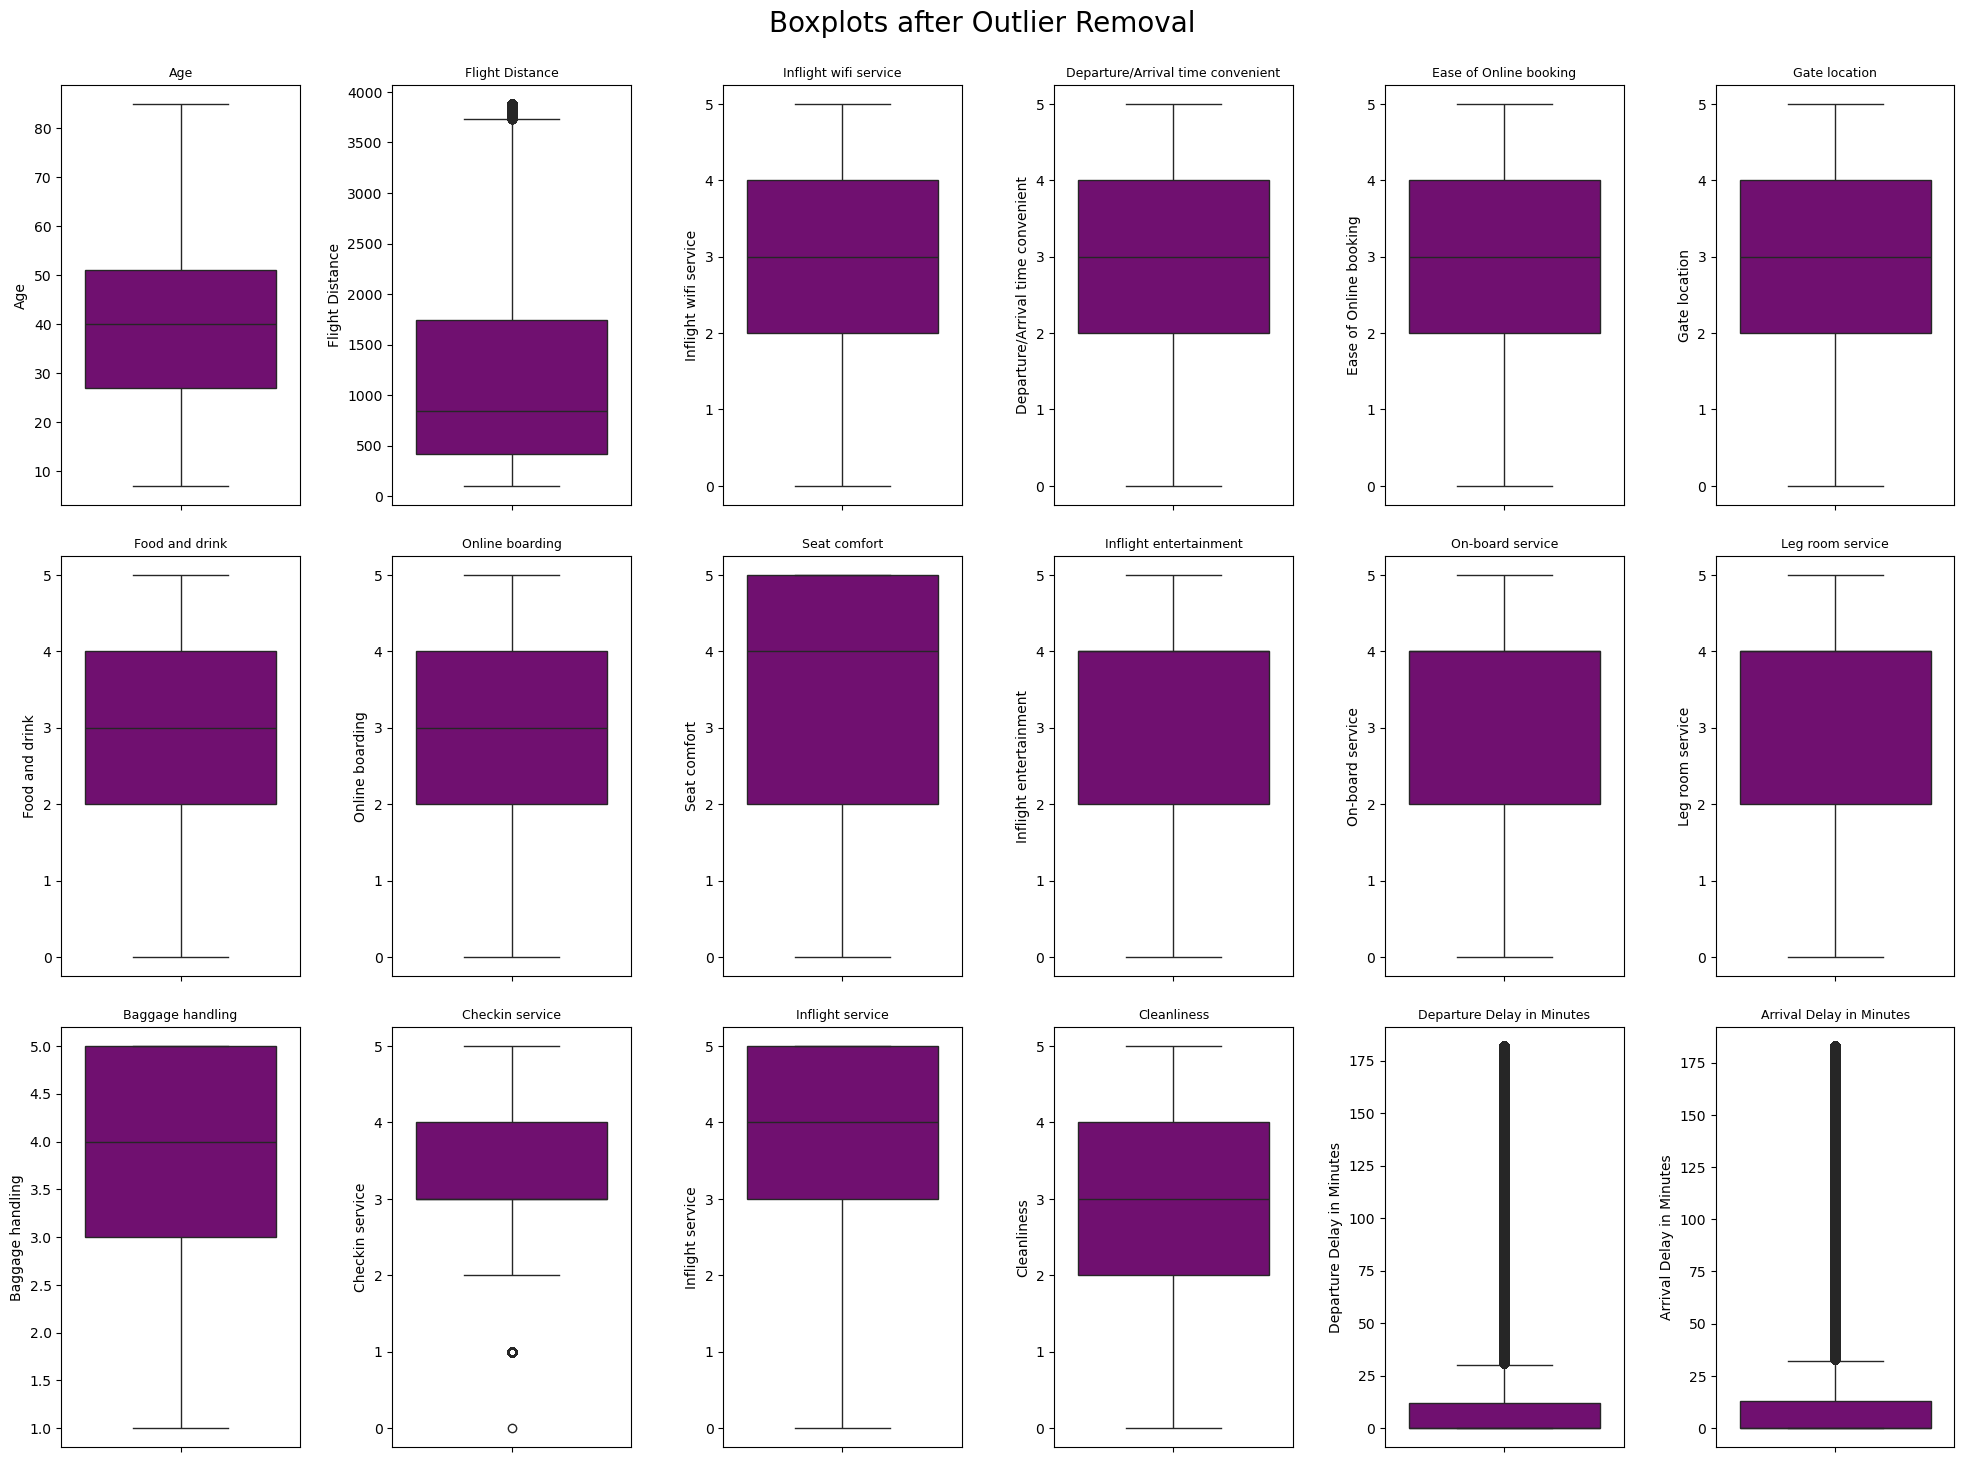

In [189]:
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplots after Outlier Removal", fontsize=20)

for i in range(len(numerical_cols)):
    plt.subplot(3, 6, i + 1)  # 3 rows, 6 columns
    sns.boxplot(y=df[numerical_cols[i]], color='purple')
    plt.title(numerical_cols[i], fontsize=9)
    plt.tight_layout(pad=2.0)

plt.subplots_adjust(top=0.93)
plt.show()

**Observation:**: Checkin service is likely based on customer ratings, typically from 0 to 5 which is valid.

## Handling Skewness

In [283]:
columns = ['Age', 'Flight Distance', 'Inflight wifi service',
                  'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Inflight service',
                  'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
skewness = df[columns].skew()
skewness

Age                                 -0.004516
Flight Distance                      1.097105
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           3.351746
Arrival Delay in Minutes             3.336670
dtype: float64

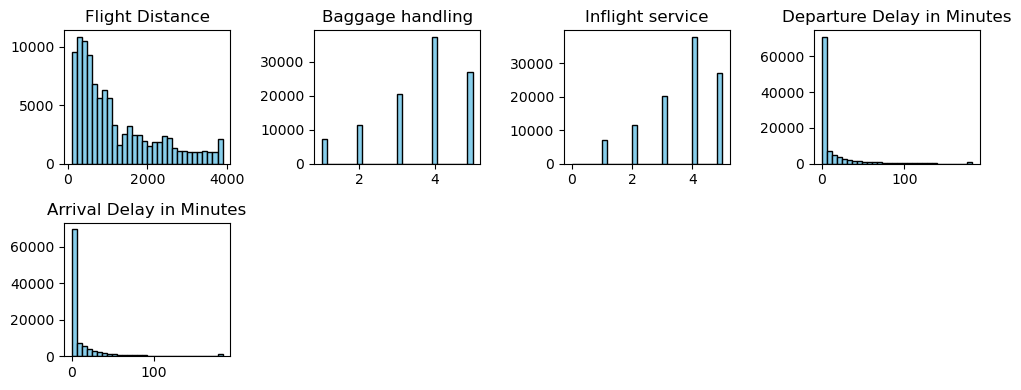

In [193]:
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(10, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 4, i)  # Adjust grid size as needed
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

## Standard scaling

In [365]:
cols_to_scale = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [367]:
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [369]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,-0.732942,3,4,3,1,...,5,4,3,4,4,5,5,0.353479,0.117315,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,-0.959275,3,2,3,3,...,1,1,5,3,1,4,1,-0.415372,-0.263403,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,-0.046899,2,2,2,2,...,5,4,3,4,4,4,5,-0.447407,-0.453762,satisfied
3,Female,Loyal Customer,25,Business travel,Business,-0.630337,2,5,5,5,...,2,2,5,3,1,4,2,-0.095017,-0.168224,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,-0.980399,3,3,3,3,...,3,3,4,4,3,3,3,-0.447407,-0.453762,satisfied


## Feature Creation & modification

In [371]:
# Convert 'satisfaction' to a binary numerical format (1 for satisfied, 0 for neutral or dissatisfied)
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})

In [373]:
# Create a new feature: Total Delay (sum of departure and arrival delays)
df["Total Delay"] = df["Departure Delay in Minutes"] + df["Arrival Delay in Minutes"]

In [375]:
df["Is Delayed"] = (df["Total Delay"] > 0).astype(int)

In [377]:
def age_group(age):
    if age < 20:
        return "Teen"
    elif age < 35:
        return "Young Adult"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["Age Group"] = df["Age"].apply(age_group)

In [379]:
df["Travel Purpose Class"] = df["Type of Travel"] + " - " + df["Class"]

In [381]:
service_cols = [
    "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]
df["Service Score"] = df[service_cols].mean(axis=1)

In [383]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Is Delayed,Age Group,Travel Purpose Class,Service Score
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,-0.732942,3,4,3,1,...,5,5,0.353479,0.117315,0,0.470794,1,Teen,Personal Travel - Eco Plus,3.857143
1,Male,disloyal Customer,25,Business travel,Business,-0.959275,3,2,3,3,...,4,1,-0.415372,-0.263403,0,-0.678775,0,Young Adult,Business travel - Business,2.285714
2,Female,Loyal Customer,26,Business travel,Business,-0.046899,2,2,2,2,...,4,5,-0.447407,-0.453762,1,-0.901169,0,Young Adult,Business travel - Business,3.714286
3,Female,Loyal Customer,25,Business travel,Business,-0.630337,2,5,5,5,...,4,2,-0.095017,-0.168224,0,-0.263241,0,Young Adult,Business travel - Business,3.000000
4,Male,Loyal Customer,61,Business travel,Business,-0.980399,3,3,3,3,...,3,3,-0.447407,-0.453762,1,-0.901169,0,Senior,Business travel - Business,3.500000


In [385]:
df.to_csv('clean.csv')

### Exploratory Data Analysis (EDA)

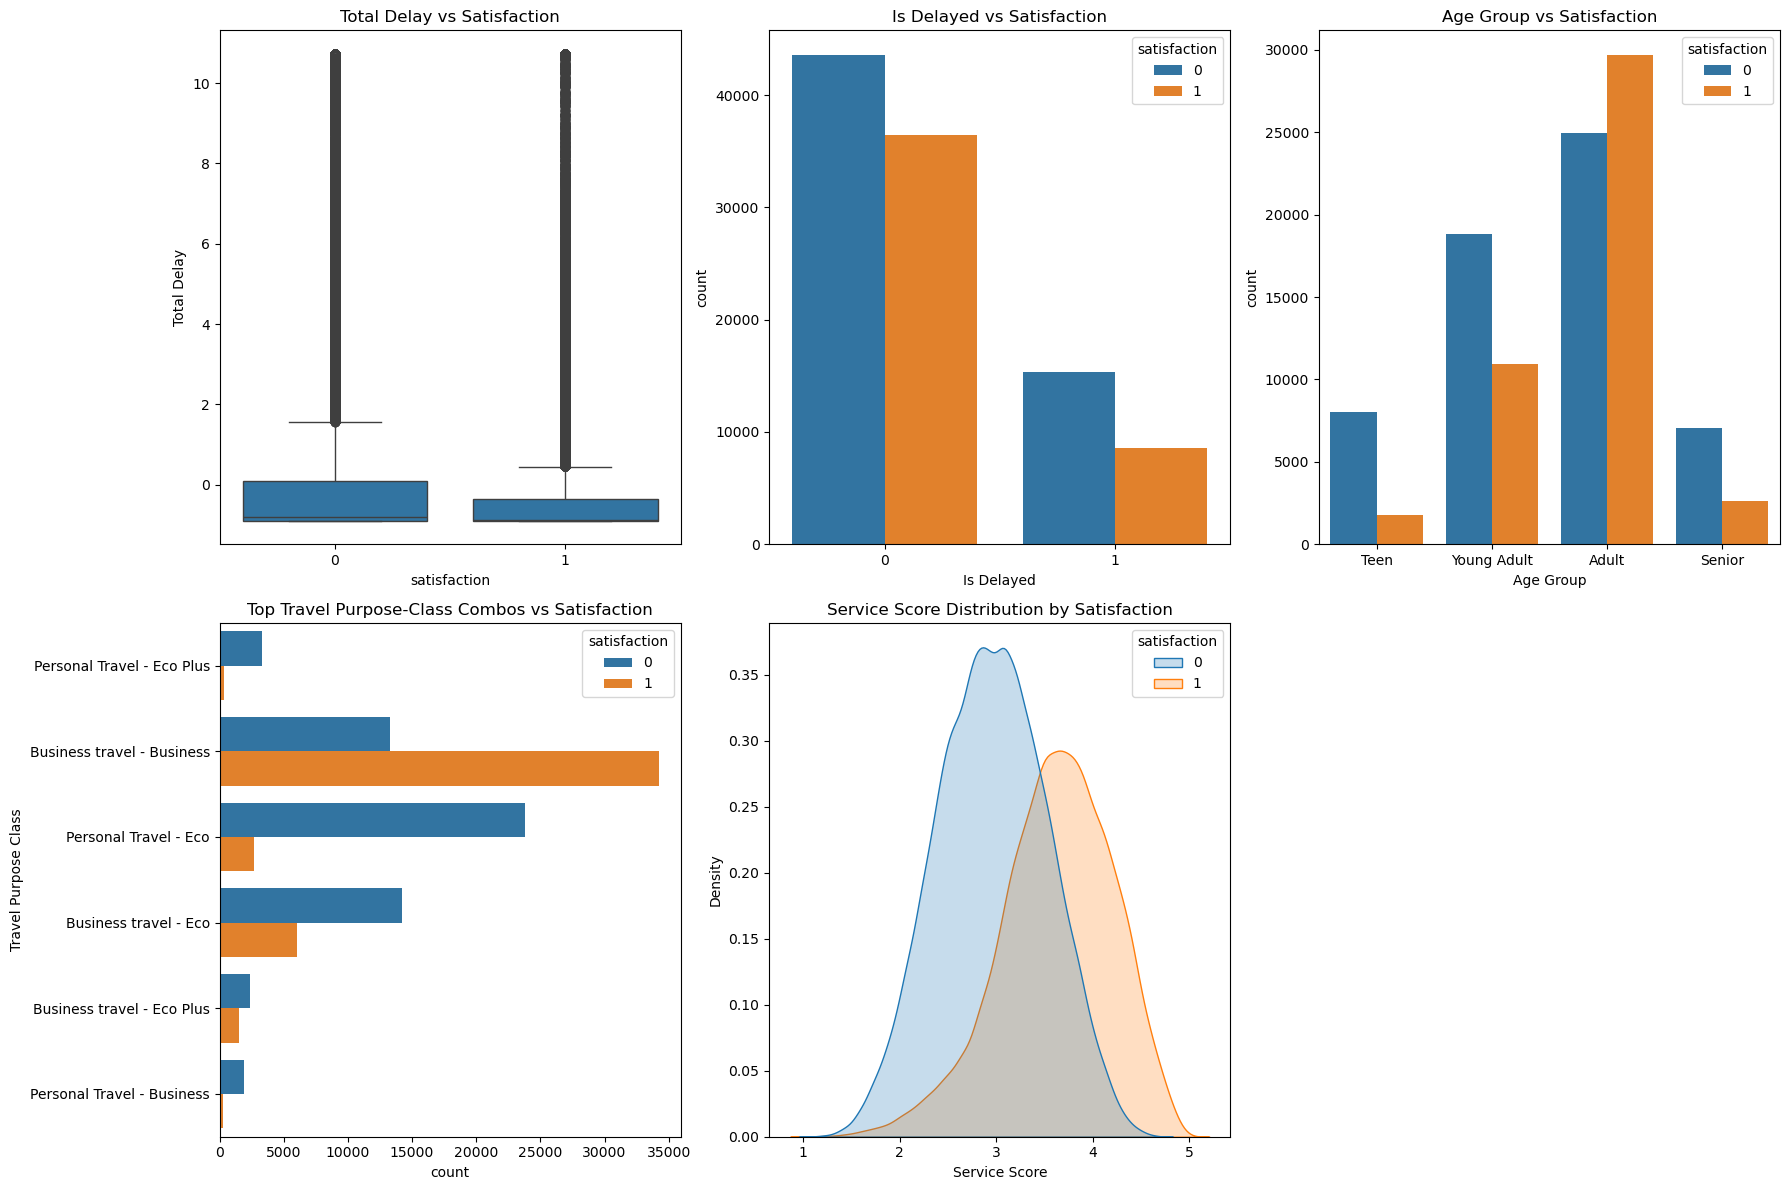

In [223]:
plt.figure(figsize=(18, 12))

# Total Delay vs Satisfaction
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="satisfaction", y="Total Delay")
plt.title("Total Delay vs Satisfaction")

# Is Delayed vs Satisfaction
plt.subplot(2, 3, 2)
sns.countplot(data=df, x="Is Delayed", hue="satisfaction")
plt.title("Is Delayed vs Satisfaction")

# Age Group vs Satisfaction
plt.subplot(2, 3, 3)
sns.countplot(data=df, x="Age Group", hue="satisfaction", order=["Teen", "Young Adult", "Adult", "Senior"])
plt.title("Age Group vs Satisfaction")

# Travel Purpose Class vs Satisfaction
plt.subplot(2, 3, 4)
top_combos = df["Travel Purpose Class"].value_counts().index[:6]
filtered = df[df["Travel Purpose Class"].isin(top_combos)]
sns.countplot(data=filtered, y="Travel Purpose Class", hue="satisfaction")
plt.title("Top Travel Purpose-Class Combos vs Satisfaction")

# Service Score vs Satisfaction
plt.subplot(2, 3, 5)
sns.kdeplot(data=df, x="Service Score", hue="satisfaction", fill=True)
plt.title("Service Score Distribution by Satisfaction")

plt.tight_layout()
plt.show()

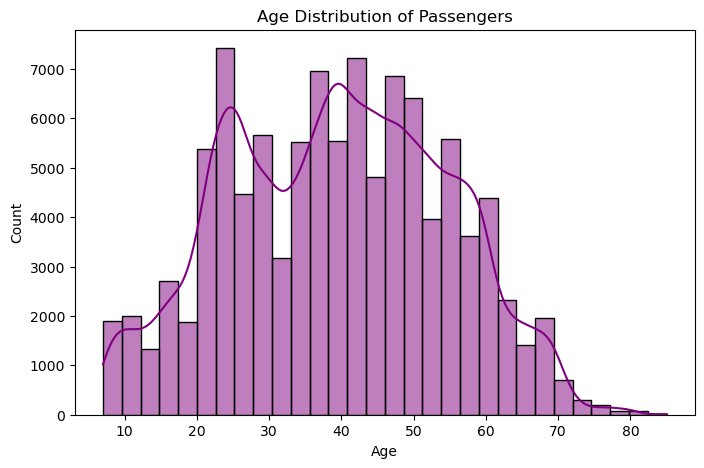

In [388]:
# Age Distribution of Passengers
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="purple")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

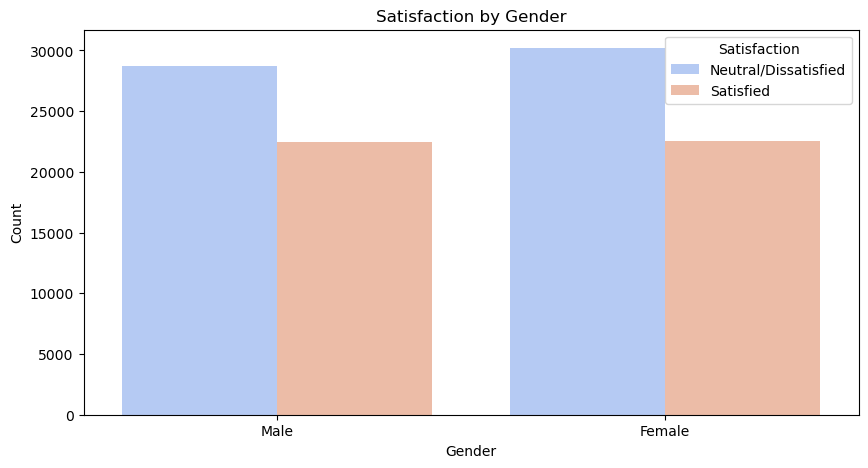

In [390]:
# Satisfaction by Gender
plt.figure(figsize=(10, 5))
sns.countplot(x="Gender", hue="satisfaction", data=df, palette="coolwarm")
plt.title("Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Satisfaction", labels=["Neutral/Dissatisfied", "Satisfied"])
plt.show()

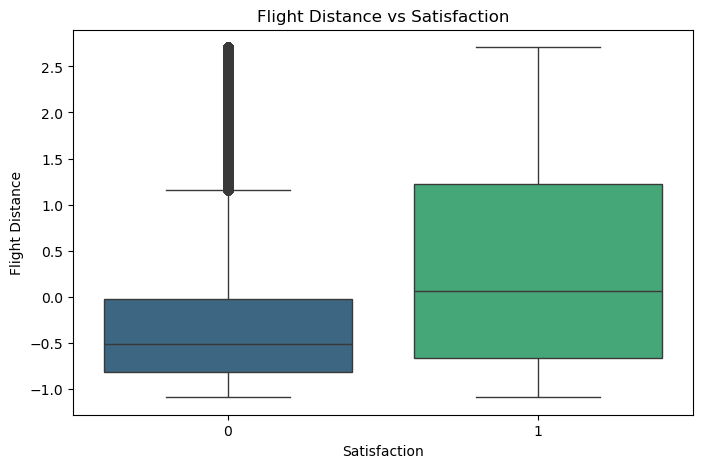

In [392]:
# Flight Distance vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x="satisfaction", y="Flight Distance", hue="satisfaction", data=df, palette="viridis", legend=False)
plt.title("Flight Distance vs Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.show()

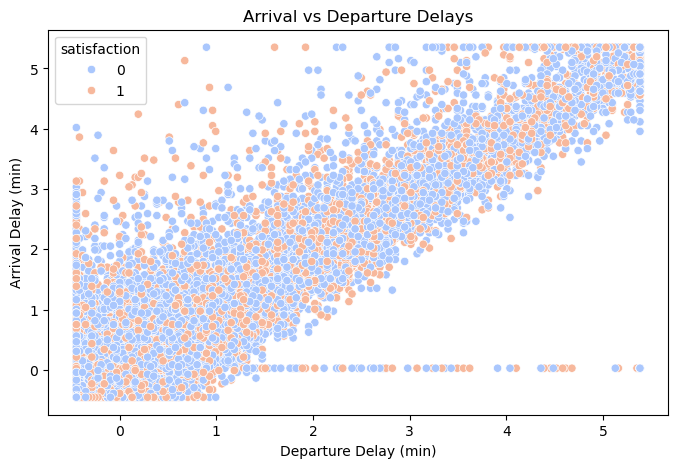

In [394]:
# Delay in Arrival vs Departure
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction", data=df, palette="coolwarm")
plt.title("Arrival vs Departure Delays")
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.show()

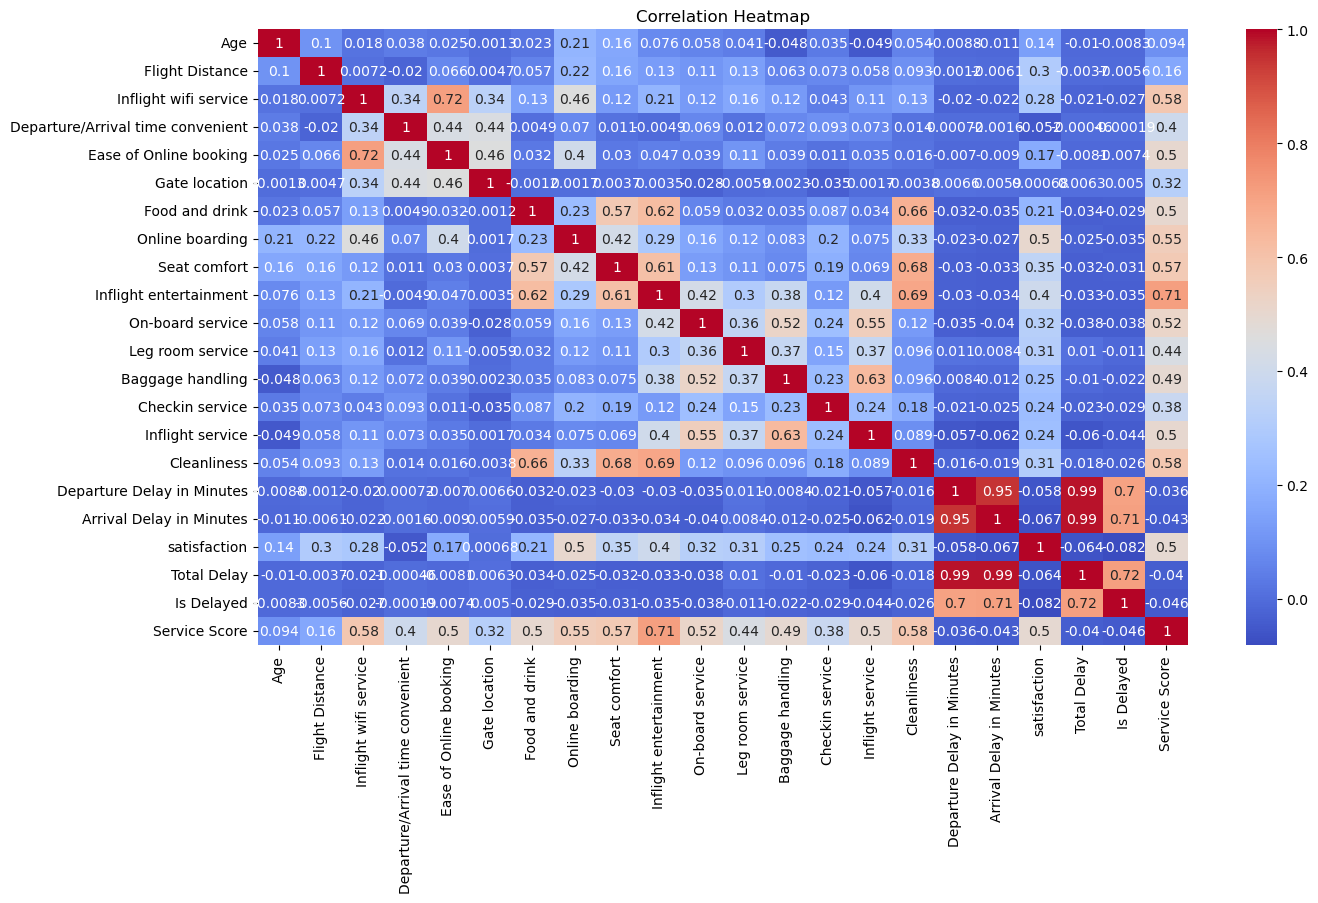

In [396]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

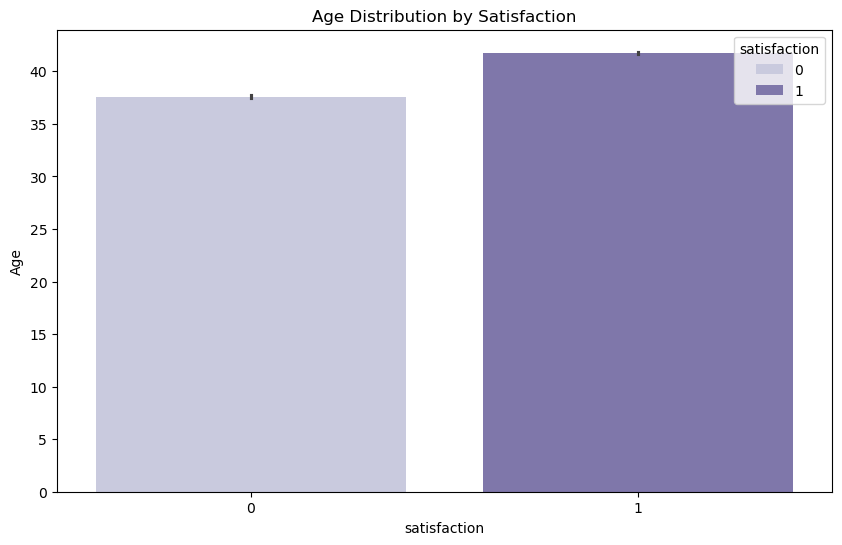

In [398]:
plt.figure(figsize=(10, 6))
sns.barplot(x='satisfaction', y='Age', data=df, hue='satisfaction', palette='Purples')
plt.title('Age Distribution by Satisfaction')
plt.show()

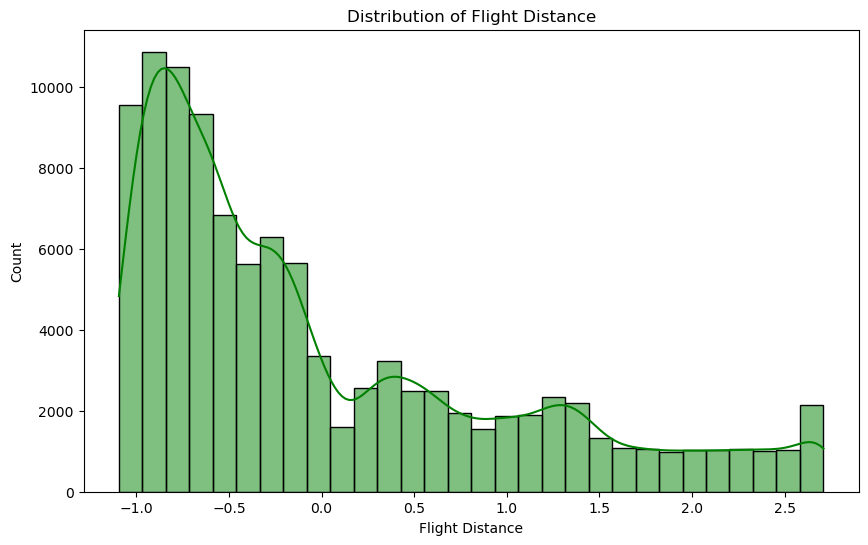

In [400]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Flight Distance'], kde=True, bins=30, color='green')
plt.title('Distribution of Flight Distance')
plt.show()

In [402]:
# Drop original delay columns to avoid redundancy
df.drop(columns=["Age", "Type of Travel", "Class","Inflight wifi service",
                 "Departure/Arrival time convenient", "Ease of Online booking",
                 "Gate location", "Food and drink", "Online boarding", "Seat comfort",
                 "Inflight entertainment", "On-board service", "Leg room service",
                 "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"], inplace=True)

In [404]:
df.head()

,Gender,Customer Type,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Is Delayed,Age Group,Travel Purpose Class,Service Score
0,Male,Loyal Customer,-0.732942,0.353479,0.117315,0,0.470794,1,Teen,Personal Travel - Eco Plus,3.857143
1,Male,disloyal Customer,-0.959275,-0.415372,-0.263403,0,-0.678775,0,Young Adult,Business travel - Business,2.285714
2,Female,Loyal Customer,-0.046899,-0.447407,-0.453762,1,-0.901169,0,Young Adult,Business travel - Business,3.714286
3,Female,Loyal Customer,-0.630337,-0.095017,-0.168224,0,-0.263241,0,Young Adult,Business travel - Business,3.000000
4,Male,Loyal Customer,-0.980399,-0.447407,-0.453762,1,-0.901169,0,Senior,Business travel - Business,3.500000


In [406]:
df.to_csv("after_feature.csv")

## Encode categorical columns

In [408]:
age_group_mapping = {
    'Teen': 0,
    'Young Adult': 1,
    'Adult': 2,
    'Senior': 3
}

df['Age Group'] = df['Age Group'].map(age_group_mapping)

In [410]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Gender', 'Customer Type', 'Travel Purpose Class']


In [412]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype='int')

In [414]:
df.head()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Is Delayed,Age Group,Service Score,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Travel Purpose Class_Business travel - Business,Travel Purpose Class_Business travel - Eco,Travel Purpose Class_Business travel - Eco Plus,Travel Purpose Class_Personal Travel - Business,Travel Purpose Class_Personal Travel - Eco,Travel Purpose Class_Personal Travel - Eco Plus
0,-0.732942,0.353479,0.117315,0,0.470794,1,0,3.857143,0,1,1,0,0,0,0,0,0,1
1,-0.959275,-0.415372,-0.263403,0,-0.678775,0,1,2.285714,0,1,0,1,1,0,0,0,0,0
2,-0.046899,-0.447407,-0.453762,1,-0.901169,0,1,3.714286,1,0,1,0,1,0,0,0,0,0
3,-0.630337,-0.095017,-0.168224,0,-0.263241,0,1,3.000000,1,0,1,0,1,0,0,0,0,0
4,-0.980399,-0.447407,-0.453762,1,-0.901169,0,3,3.500000,0,1,1,0,1,0,0,0,0,0


In [416]:
# Drop original delay columns to avoid redundancy
df.drop(columns=["Departure Delay in Minutes", "Arrival Delay in Minutes"], inplace=True)

In [418]:
df.to_csv("before_split.csv")

## Feature importances using Random Forest(Classification)

In [420]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df

,Feature,Importance
0,Flight Distance,0.274986
4,Service Score,0.270933
9,Travel Purpose Class_Business travel - Business,0.153436
1,Total Delay,0.099046
13,Travel Purpose Class_Personal Travel - Eco,0.073112
3,Age Group,0.031415
8,Customer Type_disloyal Customer,0.026165
7,Customer Type_Loyal Customer,0.019897
10,Travel Purpose Class_Business travel - Eco,0.018198
14,Travel Purpose Class_Personal Travel - Eco Plus,0.012252


## Data Imbalance Check

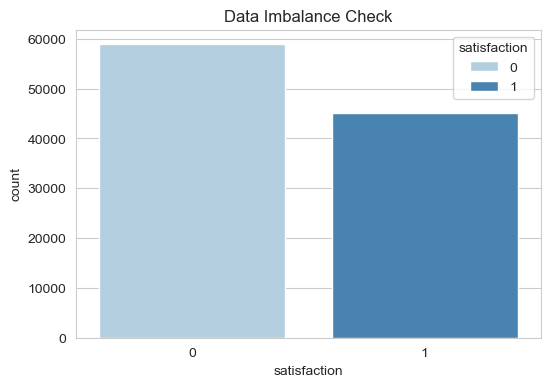

In [422]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', hue='satisfaction', data=df, palette='Blues')
plt.title('Data Imbalance Check')
plt.show()

### Apply SMOTE to balance classes

In [424]:
# Handling Imbalanced Data using SMOTE
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [428]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts())

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


satisfaction
0    41324
1    41324
Name: count, dtype: int64


### Model Training and Evaluation with MLflow

In [430]:
mlflow.set_experiment("Customers - Satisfaction_Prediction")

2025/04/14 11:44:45 INFO mlflow.tracking.fluent: Experiment with name 'Customers - Satisfaction_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:/GUVI-DS/Mini-Project4/mlruns/126030515673865786', creation_time=1744611285740, experiment_id='126030515673865786', last_update_time=1744611285740, lifecycle_stage='active', name='Customers - Satisfaction_Prediction', tags={}>

In [432]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [434]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [436]:
best_model = None
best_score = 0

Logistic Regression Before Tuning Metrics: Accuracy: 0.8383, Precision: 0.8025, Recall: 0.8354, F1 Score: 0.8186
Logistic Regression Best Params: {'C': 10, 'solver': 'liblinear'}
Logistic Regression After Tuning Metrics: Accuracy: 0.8383, Precision: 0.8027, Recall: 0.8352, F1 Score: 0.8186
Logistic Regression Confusion Matrix:
[[14760  2795]
 [ 2244 11373]]



<Figure size 600x600 with 0 Axes>

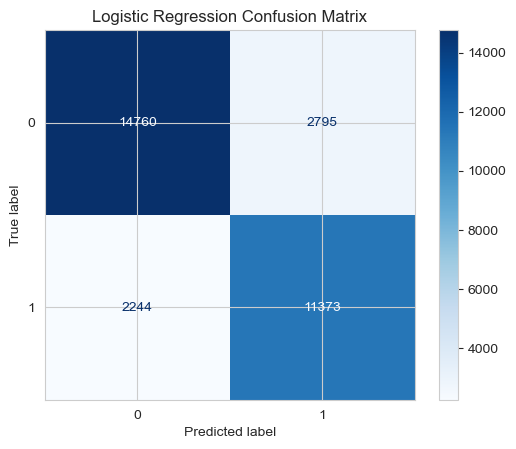

2025/04/14 11:48:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Before Tuning Metrics: Accuracy: 0.8255, Precision: 0.8160, Recall: 0.7756, F1 Score: 0.7953
Random Forest Best Params: {'max_depth': 7, 'n_estimators': 300}
Random Forest After Tuning Metrics: Accuracy: 0.8467, Precision: 0.8376, Recall: 0.8051, F1 Score: 0.8210
Random Forest Confusion Matrix:
[[15429  2126]
 [ 2654 10963]]



<Figure size 600x600 with 0 Axes>

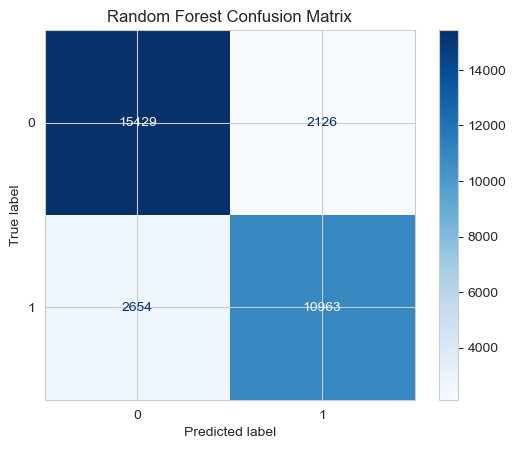

2025/04/14 11:58:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting Before Tuning Metrics: Accuracy: 0.8508, Precision: 0.8518, Recall: 0.7972, F1 Score: 0.8236
Gradient Boosting Best Params: {'learning_rate': 0.2, 'n_estimators': 300}
Gradient Boosting After Tuning Metrics: Accuracy: 0.8541, Precision: 0.8628, Recall: 0.7919, F1 Score: 0.8258
Gradient Boosting Confusion Matrix:
[[15840  1715]
 [ 2834 10783]]



<Figure size 600x600 with 0 Axes>

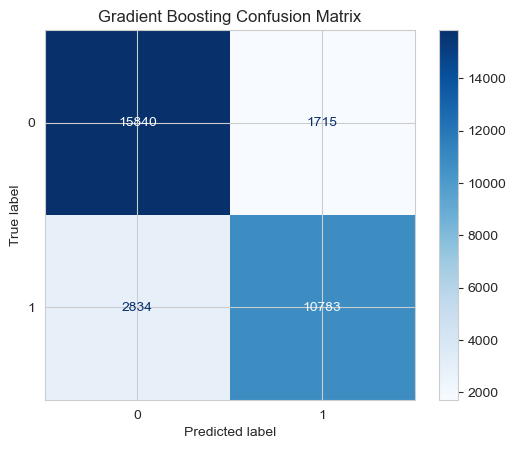

2025/04/14 12:24:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


K-Nearest Neighbors Before Tuning Metrics: Accuracy: 0.8230, Precision: 0.7970, Recall: 0.7980, F1 Score: 0.7975
K-Nearest Neighbors Best Params: {'n_neighbors': 7, 'weights': 'distance'}
K-Nearest Neighbors After Tuning Metrics: Accuracy: 0.8196, Precision: 0.7952, Recall: 0.7906, F1 Score: 0.7929
K-Nearest Neighbors Confusion Matrix:
[[14783  2772]
 [ 2852 10765]]



<Figure size 600x600 with 0 Axes>

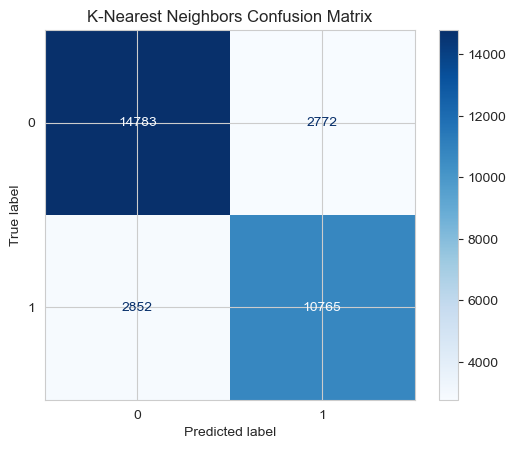

2025/04/14 12:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost Before Tuning Metrics: Accuracy: 0.8510, Precision: 0.8509, Recall: 0.7990, F1 Score: 0.8241
XGBoost Best Params: {'learning_rate': 0.1, 'n_estimators': 300}
XGBoost After Tuning Metrics: Accuracy: 0.8515, Precision: 0.8520, Recall: 0.7989, F1 Score: 0.8246
XGBoost Confusion Matrix:
[[15665  1890]
 [ 2738 10879]]



<Figure size 600x600 with 0 Axes>

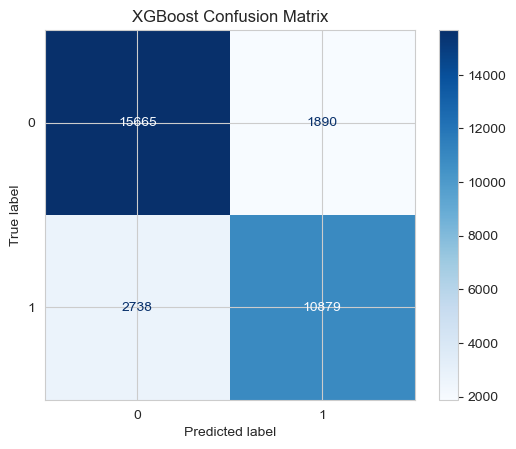

2025/04/14 12:26:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


The best model is: Gradient Boosting with accuracy: 0.8541


In [440]:
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Before tuning metrics
        model.fit(X_train_resampled, y_train_resampled)
        y_pred_before = model.predict(X_test)
        before_acc = accuracy_score(y_test, y_pred_before)
        before_precision = precision_score(y_test, y_pred_before)
        before_recall = recall_score(y_test, y_pred_before)
        before_f1 = f1_score(y_test, y_pred_before)
        print(f'{model_name} Before Tuning Metrics: Accuracy: {before_acc:.4f}, Precision: {before_precision:.4f}, Recall: {before_recall:.4f}, F1 Score: {before_f1:.4f}')

        # Hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)
        model = grid_search.best_estimator_
        print(f'{model_name} Best Params: {grid_search.best_params_}')

        # Log best parameters in MLflow
        mlflow.log_param("model_name", model_name)
        for param, value in grid_search.best_params_.items():
            mlflow.log_param(param, value)

        # After tuning metrics
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f'{model_name} After Tuning Metrics: Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        print(f'{model_name} Confusion Matrix:\n{cm}\n')

        # Track best model
        if acc > best_score:
            best_score = acc
            best_model = model_name

        # Visualization of confusion matrix
        plt.figure(figsize=(6, 6))
        ConfusionMatrixDisplay(cm).plot(cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(model, model_name)

        joblib.dump(model, f'{model_name.replace(" ", "_")}.pkl')

print(f'The best model is: {best_model} with accuracy: {best_score:.4f}')

## Cross Validation

In [451]:
# Define the model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define number of folds for Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using accuracy
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Gradient Boosting - Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Gradient Boosting - Cross-Validation Accuracy Scores: [0.8520283  0.84846735 0.85505991 0.8557336  0.85004812]
Mean Accuracy: 0.852267456312239


In [455]:
# Load the model
model = joblib.load(r"D:\GUVI-DS\Mini-Project4\Class_model\Gradient_Boosting.pkl")

# Check the model's input features
print(model.feature_names_in_)

['Flight Distance' 'Total Delay' 'Is Delayed' 'Age Group' 'Service Score'
 'Gender_Female' 'Gender_Male' 'Customer Type_Loyal Customer'
 'Customer Type_disloyal Customer'
 'Travel Purpose Class_Business travel - Business'
 'Travel Purpose Class_Business travel - Eco'
 'Travel Purpose Class_Business travel - Eco Plus'
 'Travel Purpose Class_Personal Travel - Business'
 'Travel Purpose Class_Personal Travel - Eco'
 'Travel Purpose Class_Personal Travel - Eco Plus']


In [463]:
import joblib

model = joblib.load(r"D:\GUVI-DS\Mini-Project4\Class_model\Gradient_Boosting.pkl")
print(type(model))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
